In [1]:
import random
import time
random.seed(time.time())
day=0
class Group(object):##the class of a group which could be a country or state
    infect_rate=0
    infect_num=0
    death_num=0
    cure_num=0
    def __init__(self,population,gdp,cal_out=None,iteration_function=None):
        self.population=population
        self.heathy_num=population
        self.gdp=gdp
        self.cal_out=cal_out
        self.iteration_function=iteration_function
    def get_out(self):##can cal the per time out population which will be (population,infect_num)
        tmp_total_num=self.cal_out(self.population,self.gdp)
        self.population-=tmp_total_num
        infect_people=0
        for x in range(tmp_total_num):
            if random.random() < self.infect_rate:
                infect_people+=1
        self.infect_num-=infect_people
        self.infect_rate=self.infect_num/self.rest_population()
        return tmp_total_num,infect_people
    def get_in(self,args):##by get in the data of (population,infect_num) can change the state
        self.infect_num+=args[1]
        self.population+=args[0]
        self.infect_rate=self.infect_num/self.rest_population()
        return self.infect_rate
    def next_day(self):##call this function you can get the next day state of the instance
        init=[self.infect_num,self.heathy_num,self.death_num,self.cure_num]
        (self.infect_num,self.heathy_num,self.death_num,self.cure_num)=self.iteration_function(init)
        self.infect_rate=self.infect_num/self.rest_population()
    def rest_population(self):
        return self.population - self.death_num
    def set_infect_init_rate(self,init_rate):
        self.infect_rate=init_rate
        self.infect_num=self.infect_rate*self.population

In [2]:
class Node(object):##similar to link list
    def __init__(self,group,next_group=None):
        self.group=group
        self.next_group=next_group
    def next_group(self):
        return next_group

In [3]:
from scipy.integrate import odeint   
import numpy as np 
t = np.arange(0,200,1)  
def lorenz(w, t, a, b, c,d):
    x,y,z,k=w
    return np.array([a*x*y/d-b*x-c*x,-a*x*y/d,b*x,c*x])
track1 = odeint(lorenz, (10,1000000000 , 0.0,0.0), t, args=(3*10**(-7),0.35,0.35,1))#(a,p,y,s)
print(track1)


[[ 1.00000000e+01  1.00000000e+09  0.00000000e+00  0.00000000e+00]
 [ 5.18451483e+08  4.79779573e-11  2.40774264e+08  2.40774264e+08]
 [ 2.57455406e+08 -4.40766189e-09  3.71272302e+08  3.71272302e+08]
 [ 1.27848574e+08  4.80371668e-10  4.36075718e+08  4.36075718e+08]
 [ 6.34877266e+07  6.66774286e-11  4.68256142e+08  4.68256142e+08]
 [ 3.15270750e+07  7.19481267e-10  4.84236468e+08  4.84236468e+08]
 [ 1.56558836e+07 -2.31396088e-10  4.92172063e+08  4.92172063e+08]
 [ 7.77448245e+06  3.70056983e-09  4.96112764e+08  4.96112764e+08]
 [ 3.86069399e+06 -7.93963725e-10  4.98069658e+08  4.98069658e+08]
 [ 1.91716392e+06 -3.45192343e-10  4.99041423e+08  4.99041423e+08]
 [ 9.52035412e+05 -2.28256657e-10  4.99523987e+08  4.99523987e+08]
 [ 4.72766781e+05 -1.85873972e-10  4.99763622e+08  4.99763622e+08]
 [ 2.34769038e+05 -1.67849867e-10  4.99882620e+08  4.99882620e+08]
 [ 1.16582855e+05 -1.59559792e-10  4.99941714e+08  4.99941714e+08]
 [ 5.78933331e+04 -1.55596494e-10  4.99971058e+08  4.99971058e

In [4]:
def population_infect_health_death_cure(init,**kw):
    t = np.arange(0,1,1/7)  
    def lorenz(w, t, a, b, c,d):
        x,y,z,k=w
        return np.array([a*x*y/d-b*x-c*x,-a*x*y/d,b*x,c*x])
    track1 = odeint(lorenz, init,t, args=kw['args'])#(a,p,y,s)
    return track1[1,:]

In [5]:
import pickle
#3*10**(-7) 0.05 0.05  1
#list_coeffience=(3*10**(-7),0.12,0.35,1)
list_coeffience=(3*10**(-7),0.35,0.12,1)
def cal_out(population,gdp):
    return gdp//10+100
def iteration_function(args):
    global list_coeffience
    if(day>5):
        list_coeffience=(3*10**(-7),0.12,0.35,1)
    return population_infect_health_death_cure(args,args=list_coeffience)
guinea=Group(12.4*10**6,2039,cal_out,iteration_function)
node_guinea=Node(guinea)
guinea_porpotion=245860*10**6
liberia=Group(4503000,897,cal_out,iteration_function)
node_liberia=Node(liberia)
liberia_porpotion=111369*10**6
sierra_leone=Group(7075641,1848,cal_out,iteration_function)
node_sierra_leone=Node(sierra_leone)
sierra_leone_porpotion=71740*10**6
###

dict_country={'guinea':node_guinea,'liberia':node_liberia,'sierra_leone':node_sierra_leone}
'''dict_country['guinea'].next_group=Node(liberia,sierra_leone)
dict_country['liberia'].next_group=Node(guinea,sierra_leone)
dict_country['sierra_leone'].next_group=Node(guinea,liberia)
'''
for country in dict_country:
    print(country)

guinea
liberia
sierra_leone


In [6]:
axis_x=[]
axis_y=[]
dict_axis_y_infect_num={}
dict_axis_y_death_num={}
dict_axis_y_rest_population={}
for country in dict_country:
    dict_axis_y_infect_num[country]=[]
    dict_axis_y_death_num[country]=[]
    dict_axis_y_rest_population[country]=[]

In [7]:
for x in range(5*30):
    day+=1
    dict_country['guinea'].group.set_infect_init_rate(0.01)
    axis_x.append(x)
    #dict_country['liberia'].group.set_infect_init_rate(0.01)
    #dict_country['sierra_leone'].group.set_infect_init_rate(0.01)
    for country in dict_country:
        for related_country in dict_country:
            if country!=related_country:
                #print(country,' ',related_country)
                dict_country[country].group.get_in(dict_country[related_country].group.get_out())
        dict_country[country].group.next_day()
        dict_axis_y_infect_num[country].append(dict_country[country].group.infect_num)
        dict_axis_y_death_num[country].append(dict_country[country].group.death_num)
        #print(dict_country[country].group.death_num)
        dict_axis_y_rest_population[country].append(dict_country[country].group.rest_population())
        #if(x%30==0):
            #print('the population of %s : %f;infect_rate : %f' % (country
                                                                 # ,dict_country[country].group.rest_population()
                                                                #,dict_country[country].group.infect_rate))
        


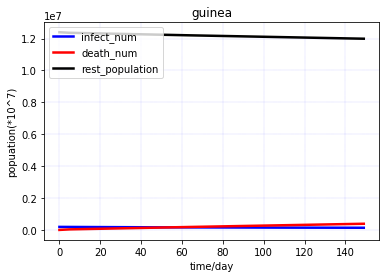

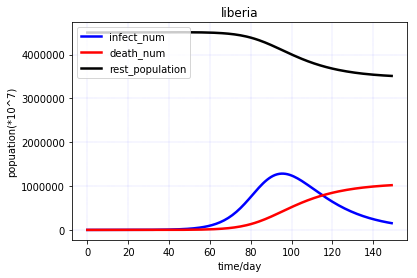

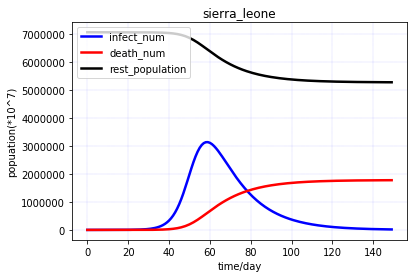

In [9]:
import numpy as np  
from pylab import *
import matplotlib.pyplot as plt  
# evenly sampled time at 200ms intervals   
# red dashes, blue squares and green triangles  
#plt.plot(axis_x, dict_axis_y['guinea'], 'r--', axis_x, dict_axis_y['liberia'], 'b:', axis_x, dict_axis_y['sierra_leone'], 'g-.')  
#plt.show()
plot(axis_x, dict_axis_y_infect_num['guinea'], color="blue", linewidth=2.5, linestyle="-", label="infect_num")
plot(axis_x, dict_axis_y_death_num['guinea'], color="red",  linewidth=2.5, linestyle="-", label="death_num")
plot(axis_x,  dict_axis_y_rest_population['guinea'], color="black",  linewidth=2.5, linestyle="-", label="rest_population")
legend(loc='upper left')
plt.xlabel('time/day')
plt.ylabel('popuation(*10^7)')
plt.grid(True, linestyle = "-.", color = "blue", linewidth = "0.1") 
plt.title('guinea')
plt.show()

plot(axis_x, dict_axis_y_infect_num['liberia'], color="blue", linewidth=2.5, linestyle="-", label="infect_num")
plot(axis_x, dict_axis_y_death_num['liberia'], color="red",  linewidth=2.5, linestyle="-", label="death_num")
plot(axis_x,  dict_axis_y_rest_population['liberia'], color="black",  linewidth=2.5, linestyle="-", label="rest_population")
legend(loc='upper left')
plt.xlabel('time/day')
plt.ylabel('popuation(*10^7)')
plt.grid(True, linestyle = "-.", color = "blue", linewidth = "0.1") 
plt.title('liberia')
plt.show()

plot(axis_x, dict_axis_y_infect_num['sierra_leone'], color="blue", linewidth=2.5, linestyle="-", label="infect_num")
plot(axis_x, dict_axis_y_death_num['sierra_leone'], color="red",  linewidth=2.5, linestyle="-", label="death_num")
plot(axis_x,  dict_axis_y_rest_population['sierra_leone'], color="black",  linewidth=2.5, linestyle="-", label="rest_population")
legend(loc='upper left')
plt.xlabel('time/day')
plt.ylabel('popuation(*10^7)')
plt.grid(True, linestyle = "-.", color = "blue", linewidth = "0.1") 
plt.title('sierra_leone')
plt.show()